In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
file_paths = {
    "5.8": "5.8.csv",
    "5.16": "5.16.csv",
    "10.8": "10.8.csv",
    "10.16": "10.16.csv",
}

# Load all CSVs into dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [3]:
# Combine all datasets into a single dataframe with labels
for name, df in dataframes.items():
    df['folds'] = int(name.split('.')[0])  # Extract k-fold count (5 or 10)
    df['batch_size'] = int(name.split('.')[1])  # Extract batch size (8 or 16)
data = pd.concat(dataframes.values(), ignore_index=True)

In [4]:

# Display summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
        learning_rate      epochs  batch_size  hidden_size  num_layers  \
count   2.320000e+02  232.000000  232.000000   232.000000  232.000000   
mean    1.000000e-03   75.517241   12.000000   154.482759    2.086207   
std     6.519278e-19   25.528011    4.008649    80.809164    0.858560   
min     1.000000e-03   40.000000    8.000000    64.000000    1.000000   
25%     1.000000e-03   40.000000    8.000000    64.000000    1.000000   
50%     1.000000e-03   80.000000   12.000000   128.000000    2.000000   
75%     1.000000e-03  100.000000   16.000000   256.000000    3.000000   
max     1.000000e-03  120.000000   16.000000   256.000000    4.000000   

       avg_train_loss  avg_val_loss  avg_mask2_coverage  avg_mask2_accuracy  \
count      232.000000    232.000000          232.000000          232.000000   
mean         0.391555      0.390104            0.617030            0.683107   
std          0.126003      0.121026            0.118693            0.120929   
min  

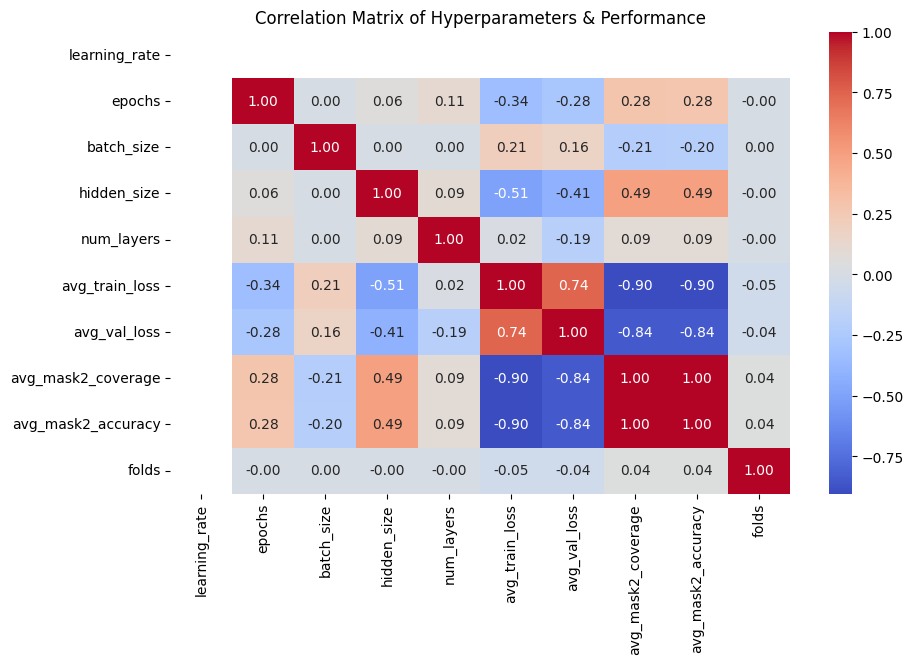

In [5]:
# Exclude non-numeric columns before computing correlations
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Hyperparameters & Performance")
plt.show()

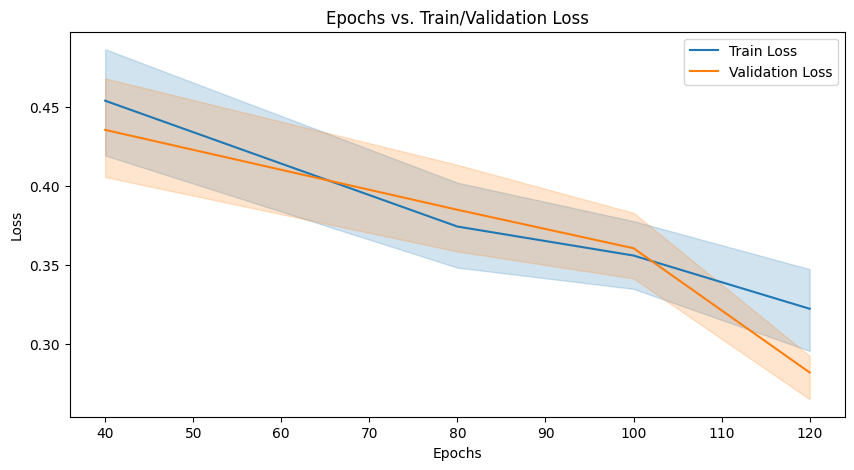

In [6]:
# 1. Epochs vs. Loss
plt.figure(figsize=(10, 5))
sns.lineplot(x='epochs', y='avg_train_loss', data=data, label='Train Loss')
sns.lineplot(x='epochs', y='avg_val_loss', data=data, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs. Train/Validation Loss")
plt.legend()
plt.show()

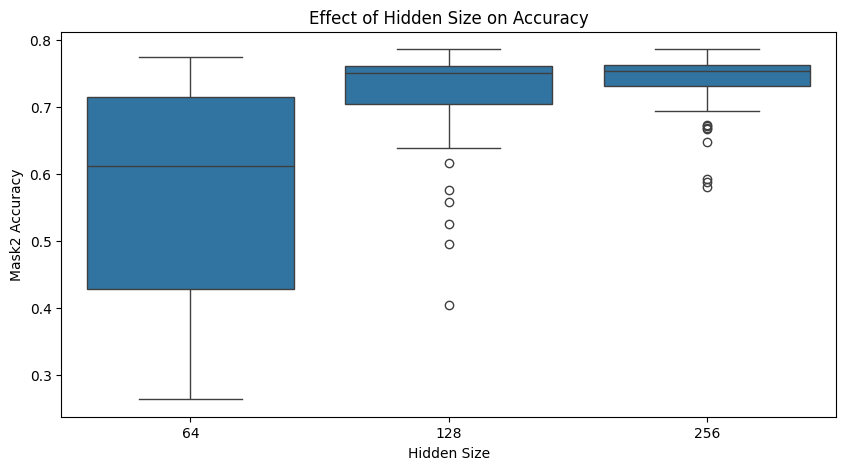

In [7]:
# 2. Hidden Size vs. Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="hidden_size", y="avg_mask2_accuracy", data=data)
plt.xlabel("Hidden Size")
plt.ylabel("Mask2 Accuracy")
plt.title("Effect of Hidden Size on Accuracy")
plt.show()

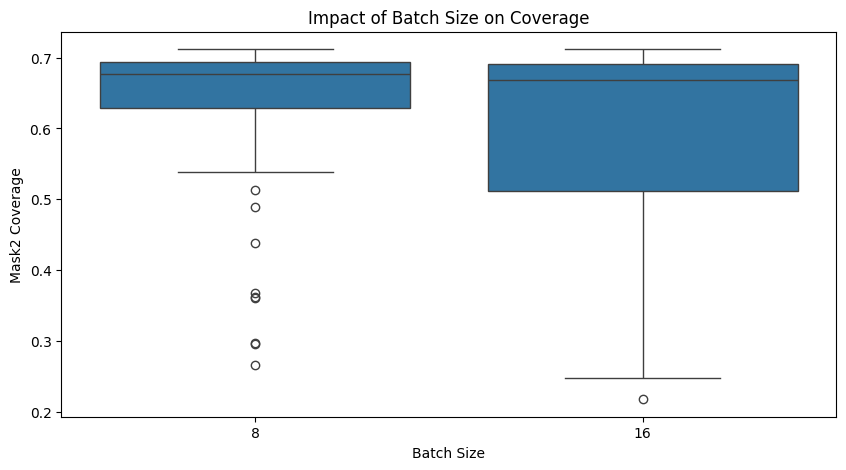

In [8]:
# 3. Batch Size Effect on Coverage
plt.figure(figsize=(10, 5))
sns.boxplot(x="batch_size", y="avg_mask2_coverage", data=data)
plt.xlabel("Batch Size")
plt.ylabel("Mask2 Coverage")
plt.title("Impact of Batch Size on Coverage")
plt.show()

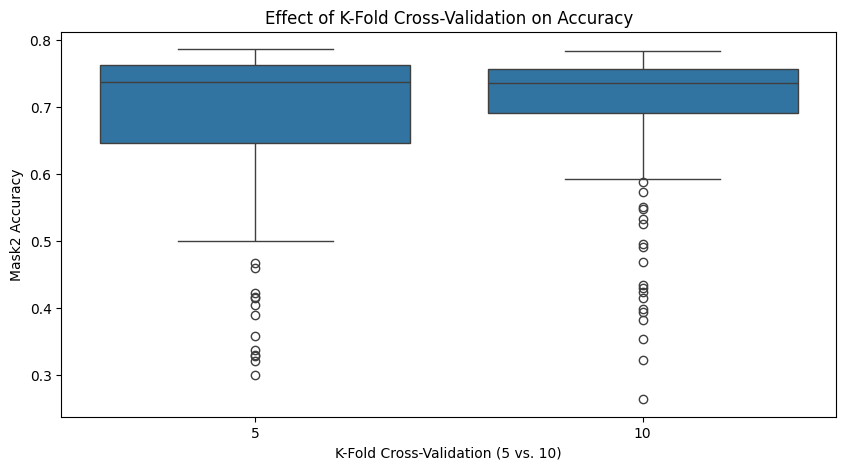

In [9]:
# 4. K-Fold Effect on Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="folds", y="avg_mask2_accuracy", data=data)
plt.xlabel("K-Fold Cross-Validation (5 vs. 10)")
plt.ylabel("Mask2 Accuracy")
plt.title("Effect of K-Fold Cross-Validation on Accuracy")
plt.show()

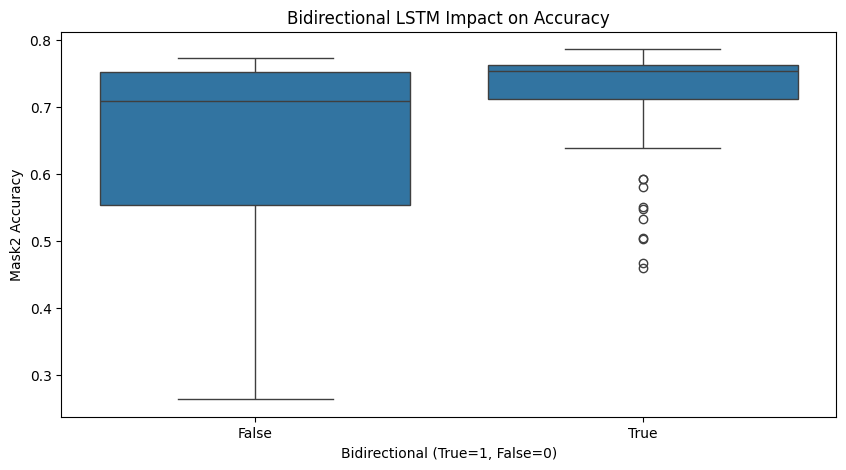

In [10]:
# 5. Bidirectional Effect on Accuracy
plt.figure(figsize=(10, 5))
sns.boxplot(x="bidirectional", y="avg_mask2_accuracy", data=data)
plt.xlabel("Bidirectional (True=1, False=0)")
plt.ylabel("Mask2 Accuracy")
plt.title("Bidirectional LSTM Impact on Accuracy")
plt.show()

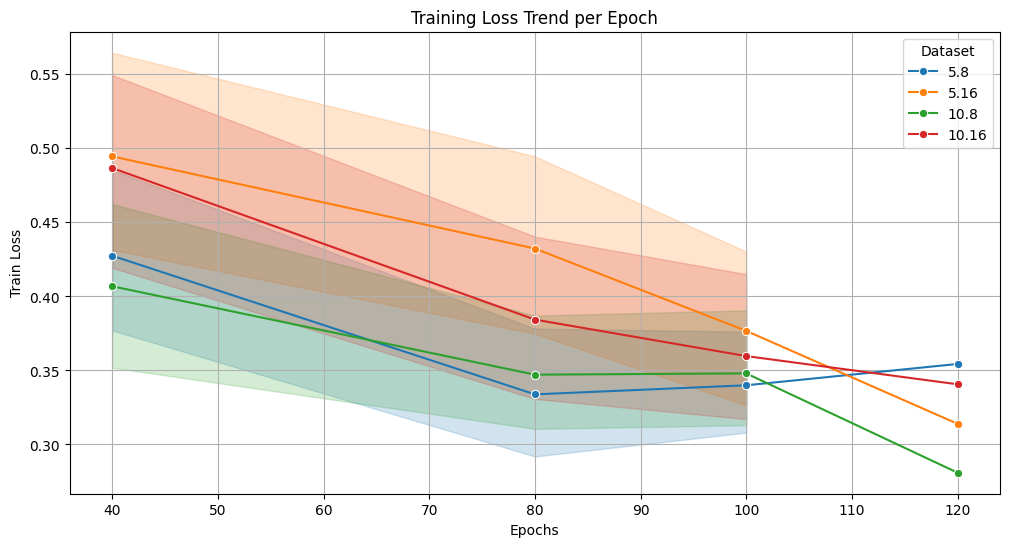

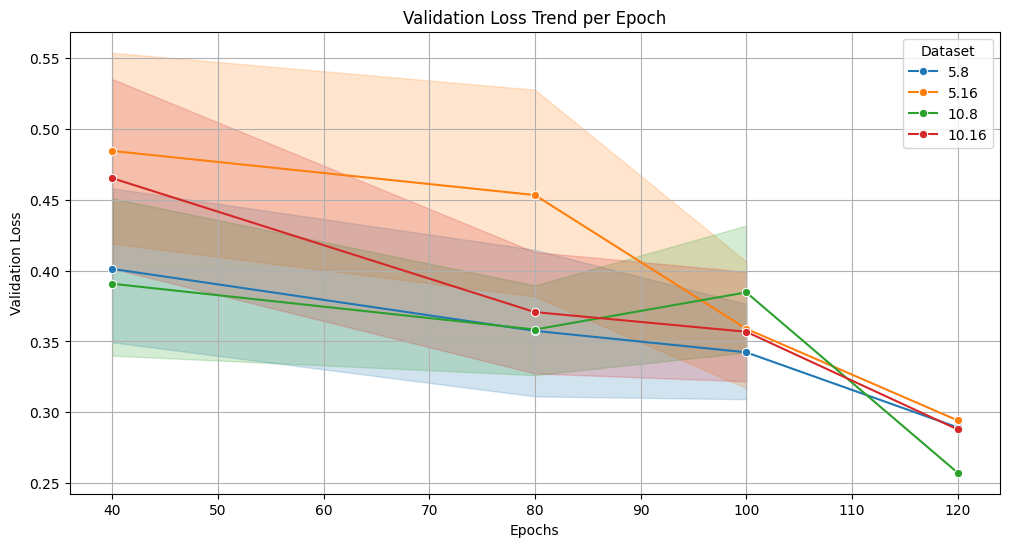

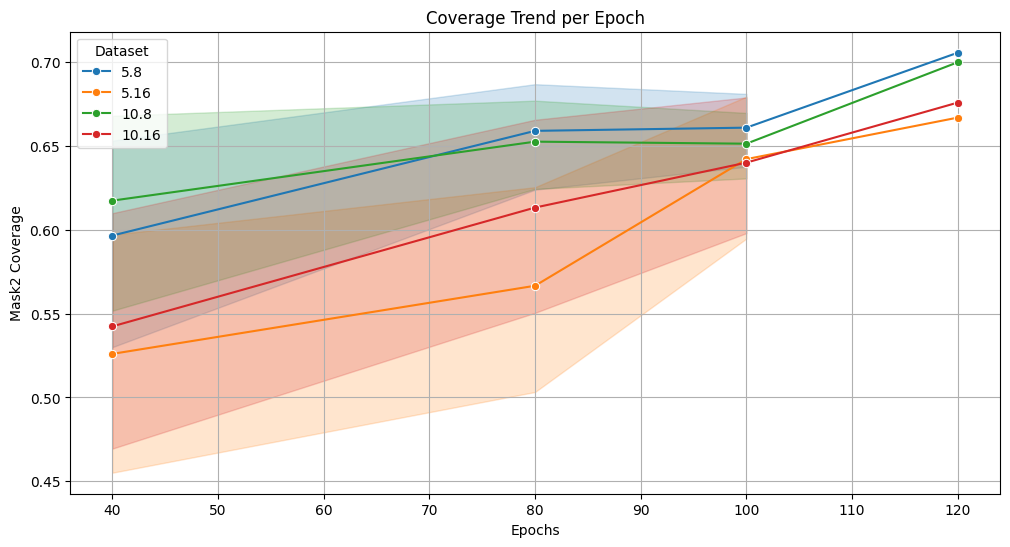

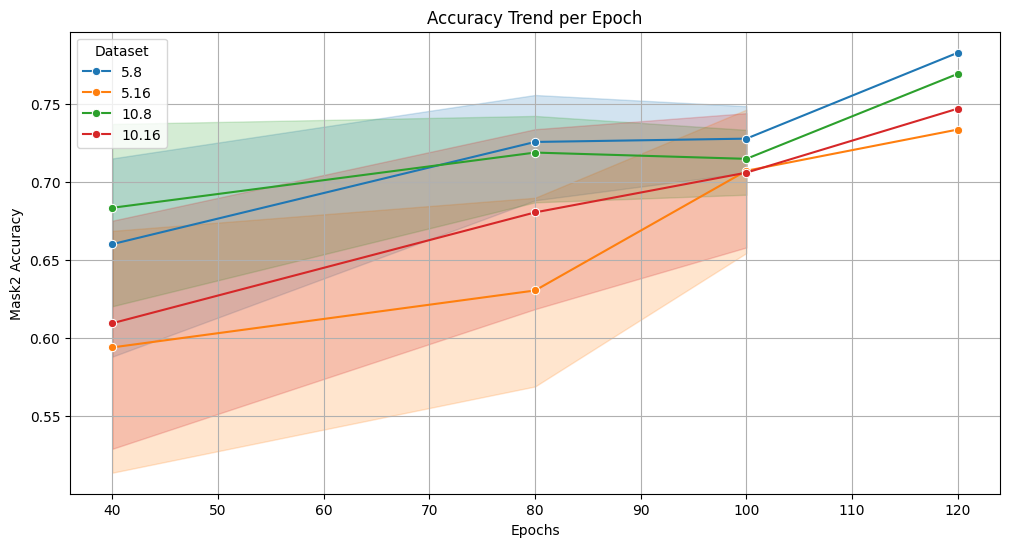

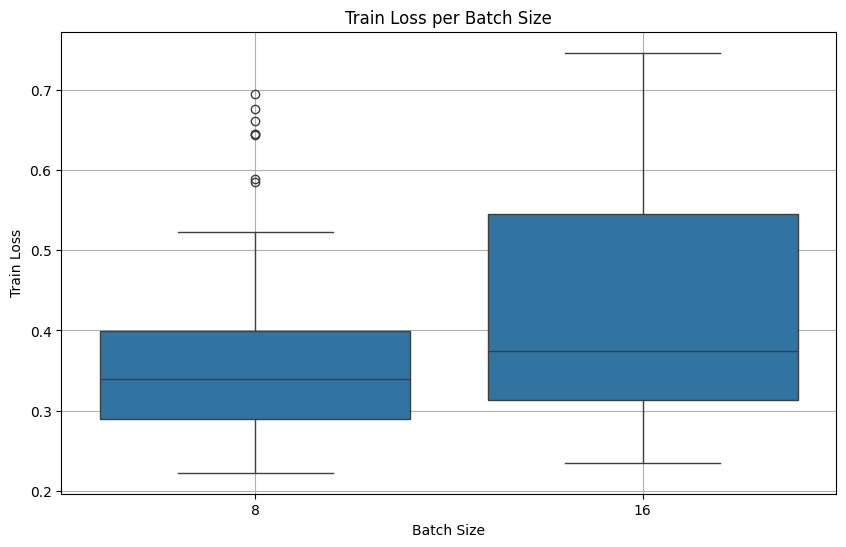

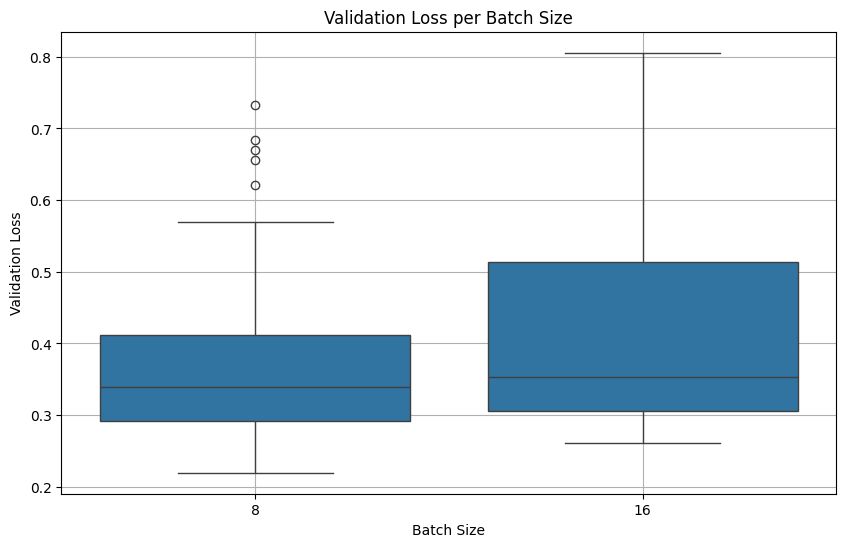

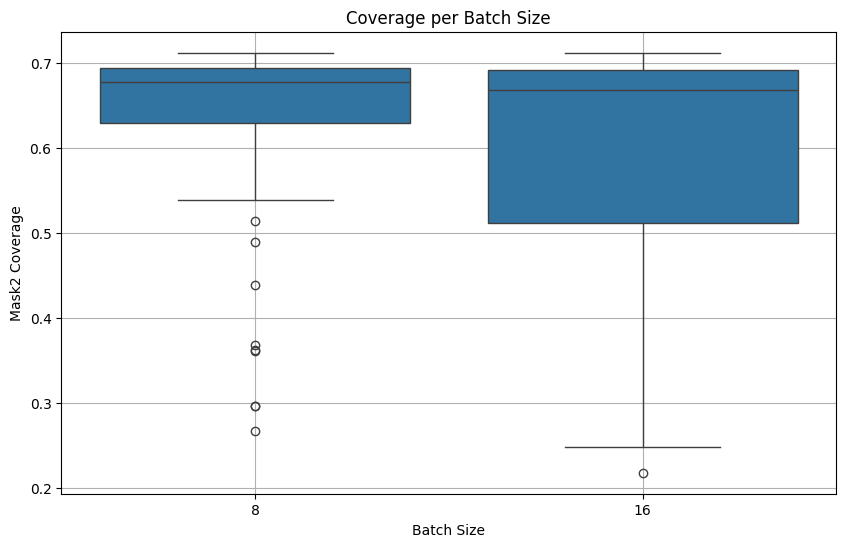

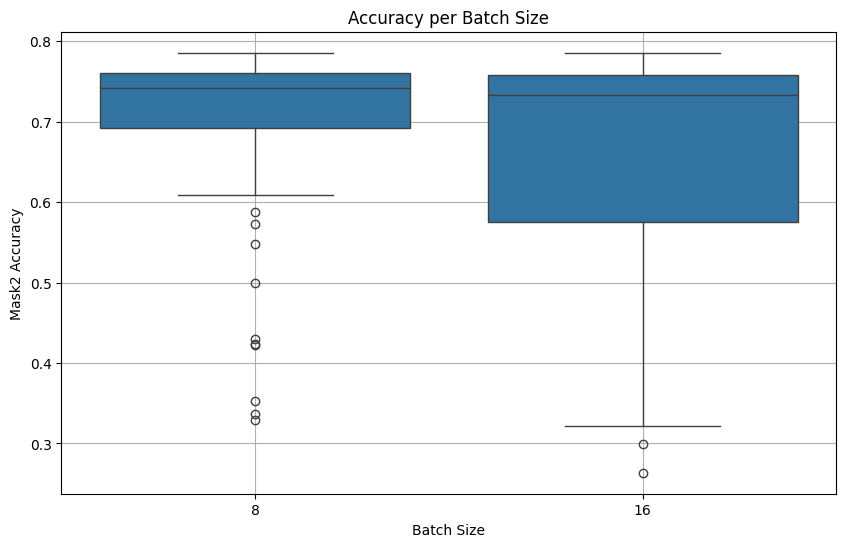

NameError: name 'tools' is not defined

In [11]:


# Aggregate all data for a combined EDA
df_combined = pd.concat(dataframes.values(),
                        keys=dataframes.keys(), names=['dataset'])

# Reset index for easier manipulation
df_combined.reset_index(inplace=True)

# Function to plot loss, coverage, and accuracy trends per epoch


def plot_metric_trends(df, metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='epochs', y=metric, hue='dataset', marker='o')
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Dataset")
    plt.grid(True)
    plt.show()


# Plot trends for Loss, Coverage, and Accuracy per Epoch
plot_metric_trends(df_combined, "avg_train_loss",
                   "Training Loss Trend per Epoch", "Train Loss")
plot_metric_trends(df_combined, "avg_val_loss",
                   "Validation Loss Trend per Epoch", "Validation Loss")
plot_metric_trends(df_combined, "avg_mask2_coverage",
                   "Coverage Trend per Epoch", "Mask2 Coverage")
plot_metric_trends(df_combined, "avg_mask2_accuracy",
                   "Accuracy Trend per Epoch", "Mask2 Accuracy")

# Function to plot performance trends per batch size


def plot_performance_by_batch(df, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="batch_size", y=metric, data=df)
    plt.xlabel("Batch Size")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Plot performance per batch size
plot_performance_by_batch(df_combined, "avg_train_loss",
                          "Train Loss per Batch Size", "Train Loss")
plot_performance_by_batch(df_combined, "avg_val_loss",
                          "Validation Loss per Batch Size", "Validation Loss")
plot_performance_by_batch(
    df_combined, "avg_mask2_coverage", "Coverage per Batch Size", "Mask2 Coverage")
plot_performance_by_batch(
    df_combined, "avg_mask2_accuracy", "Accuracy per Batch Size", "Mask2 Accuracy")

# Insights on best-performing models
best_models = df_combined.nsmallest(5, "avg_val_loss")[
    ["dataset", "epochs", "batch_size", "hidden_size", "num_layers", "avg_val_loss", "avg_mask2_coverage", "avg_mask2_accuracy"]]

# Display best-performing models
tools.display_dataframe_to_user(
    name="Top 5 Best Performing Models", dataframe=best_models)

In [ ]:
# Define overfitting condition: when train loss is significantly lower than validation loss
overfitting_threshold = 0.02

# Identify overfitting models in each dataset
overfitting_models = []
for name, df in dataframes.items():
    overfit_df = df[df["avg_train_loss"] < (
        df["avg_val_loss"] - overfitting_threshold)].copy()
    overfit_df["Dataset"] = name  # Add dataset name as a column
    overfitting_models.append(overfit_df)

# Combine all overfitting models into a single dataframe
overfitting_models_df = pd.concat(overfitting_models, ignore_index=True)

# Total count of overfitted jobs
total_overfitted_jobs = len(overfitting_models_df)

# Display total count and full details
print(f"Total Overfitted Jobs: {total_overfitted_jobs}")
overfitting_models_df

Total Overfitted Jobs: 76


,job_name,learning_rate,epochs,batch_size,hidden_size,num_layers,bidirectional,avg_train_loss,avg_val_loss,avg_mask2_coverage,avg_mask2_accuracy,folds,Dataset
0,job_9,0.001,80,8,64,2,True,0.260226,0.338927,0.698694,0.771856,5,5.8
1,job_13,0.001,100,8,64,1,True,0.376216,0.504828,0.538623,0.638509,5,5.8
2,job_21,0.001,40,8,128,2,True,0.283860,0.430693,0.657700,0.720770,5,5.8
3,job_22,0.001,40,8,128,2,False,0.398579,0.570117,0.592545,0.661207,5,5.8
4,job_26,0.001,80,8,128,1,False,0.351729,0.504418,0.632294,0.700748,5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,job_46,0.001,80,16,256,2,False,0.392936,0.454904,0.595096,0.667836,10,10.16
72,job_49,0.001,100,16,256,1,True,0.248807,0.318120,0.695909,0.762786,10,10.16
73,job_50,0.001,100,16,256,1,False,0.279185,0.322248,0.696579,0.767719,10,10.16
74,job_51,0.001,100,16,256,2,True,0.398448,0.432393,0.655668,0.717222,10,10.16


In [ ]:
# Count number of overfitted jobs per dataset
overfitting_counts_per_dataset = overfitting_models_df.groupby(
    "Dataset").size().reset_index(name="Overfitted Job Count")

# Display the count of overfitted jobs per dataset
print("Overfitted Jobs Per Dataset:")
print(overfitting_counts_per_dataset)

# Display the full list of overfitted jobs per dataset
overfitting_models_df_sorted = overfitting_models_df.sort_values(
    by=["Dataset", "avg_val_loss"], ascending=True)
overfitting_counts_per_dataset, overfitting_models_df_sorted

Overfitted Jobs Per Dataset:
  Dataset  Overfitted Job Count
0   10.16                    17
1    10.8                    22
2    5.16                    18
3     5.8                    19


(  Dataset  Overfitted Job Count
 0   10.16                    17
 1    10.8                    22
 2    5.16                    18
 3     5.8                    19,
    job_name  learning_rate  epochs  batch_size  hidden_size  num_layers  \
 69   job_43          0.001      80          16          256           1   
 65   job_31          0.001     100          16          128           1   
 60   job_15          0.001     100          16           64           2   
 66   job_33          0.001     100          16          128           2   
 72   job_49          0.001     100          16          256           1   
 ..      ...            ...     ...         ...          ...         ...   
 4    job_26          0.001      80           8          128           1   
 1    job_13          0.001     100           8           64           1   
 3    job_22          0.001      40           8          128           2   
 11   job_41          0.001      40           8          256           3  